<a href="https://colab.research.google.com/github/Egeny-aa/Yandex/blob/main/2023/%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_2_Yandex_meetup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [2]:
train_df = pd.read_csv('/content/gym_data.txt')

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8100 entries, 0 to 8099
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Row                           8100 non-null   int64  
 1   Registration                  8100 non-null   int64  
 2   Zipcode                       8100 non-null   int64  
 3   Age                           8100 non-null   int64  
 4   Partner_company               8100 non-null   int64  
 5   Friend_promo                  8100 non-null   int64  
 6   Contract_period               8100 non-null   int64  
 7   Lifetime                      8100 non-null   int64  
 8   Class_registration_weekly     8100 non-null   float64
 9   Avg_additional_charges_total  8100 non-null   float64
 10  Cancellation_freq             8100 non-null   float64
 11  Exited                        8100 non-null   int64  
 12  Unnamed: 12                   0 non-null      float64
dtypes: 

Как видно из информационной таблицы, пропущенных значений нет.

Ничего заполнять не нужно


In [4]:
new_tr = train_df.drop('Unnamed: 12', axis = 1)

In [5]:
new_tr.head()

,Row,Registration,Zipcode,Age,Partner_company,Friend_promo,Contract_period,Lifetime,Class_registration_weekly,Avg_additional_charges_total,Cancellation_freq,Exited
0,10001,2000159,57328,37,0,1,6,10,1.06,134.200000,0.01,0
1,10002,2000235,29941,32,0,1,12,7,1.54,177.600000,0.07,0
2,10003,2000297,57328,29,0,1,6,5,2.15,205.000000,0.28,0
3,10004,2000435,29941,76,1,0,6,5,3.10,220.666667,0.39,0
4,10005,2000774,29941,24,1,0,1,3,1.00,142.040000,0.12,1


In [6]:
new_tr.corr()

,Row,Registration,Zipcode,Age,Partner_company,Friend_promo,Contract_period,Lifetime,Class_registration_weekly,Avg_additional_charges_total,Cancellation_freq,Exited
Row,1.000000,0.999936,0.012913,0.014521,0.005147,-0.009184,0.003929,-0.005669,-0.002320,0.008209,-0.017285,-0.001439
Registration,0.999936,1.000000,0.012945,0.014428,0.005111,-0.009231,0.004081,-0.005358,-0.002280,0.008094,-0.017310,-0.001464
Zipcode,0.012913,0.012945,1.000000,-0.120193,0.001835,0.009833,0.082698,0.079364,0.119956,0.145650,-0.126776,-0.301095
Age,0.014521,0.014428,-0.120193,1.000000,0.001319,0.015340,-0.077715,-0.116899,-0.128960,-0.229965,0.162721,0.373492
Partner_company,0.005147,0.005111,0.001835,0.001319,1.000000,-0.411229,-0.001470,0.011820,0.007755,0.019319,0.001991,-0.011876
Friend_promo,-0.009184,-0.009231,0.009833,0.015340,-0.411229,1.000000,0.000475,-0.014500,0.000154,0.034762,-0.025547,-0.021422
Contract_period,0.003929,0.004081,0.082698,-0.077715,-0.001470,0.000475,1.000000,0.076211,0.092774,0.100585,-0.115249,-0.254760
Lifetime,-0.005669,-0.005358,0.079364,-0.116899,0.011820,-0.014500,0.076211,1.000000,0.096470,0.161282,-0.124104,-0.296143
Class_registration_weekly,-0.002320,-0.002280,0.119956,-0.128960,0.007755,0.000154,0.092774,0.096470,1.000000,0.213975,0.300244,-0.380576
Avg_additional_charges_total,0.008209,0.008094,0.145650,-0.229965,0.019319,0.034762,0.100585,0.161282,0.213975,1.000000,-0.171120,-0.541993


Как видно из коррялиционной матрицы, признаки Row, Registration самые некоррелируемые с таргетом(они имеют порядок 10^-3). Следовательно их можно удалить

In [7]:
train_data = new_tr.drop(['Row', 'Registration'], axis = 1)

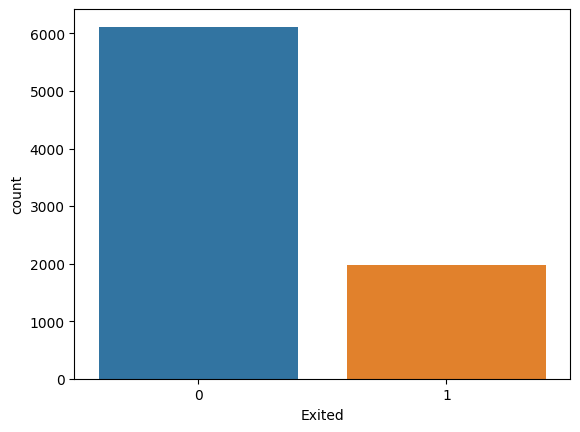

In [8]:
x = new_tr['Exited']
sns.countplot(x= x, data = new_tr )
plt.show()

Из распределения видно, что в датасете дисбаланс классов.

Учтем это при разделении датасета на тренировочную и валидационную выборку.

На тренировочной выборке найдем приемлемые гиперпараметры, оценим соответствующую метрику. И если она нас не устроит, то перед предиктом на тестовой создадим новый классификатор и обучим его на всех доступных данных.



In [9]:
X, y = train_data.drop('Exited', axis = 1), train_data['Exited']

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.8, 
                                                    random_state=42,
                                                    stratify=y)

Из всх алгоритмов классификации интуитивно выбирем лучший - CatboostClassifier

In [11]:
!pip install catboost
from catboost import CatBoostClassifier

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 12.5 MB/s eta 0:00:00


In [14]:
def choice_best_gp(num_clf, x_tr, y_tr, x_val,y_val):
  best_clf, metric = None, None
  for _ in range(num_clf):
    iter = int(np.random.uniform(5000, 10000))
    depth = np.random.choice([3,4,5,6])
    learning_rate = np.random.uniform(0.1, 0.0001)
    l2_leaf_reg = learning_rate / 10

    clf = CatBoostClassifier(iterations=iter,
                           depth=depth,
                           learning_rate=learning_rate,
                           l2_leaf_reg = l2_leaf_reg,
                           loss_function='Logloss',
                           verbose=True)
    
    clf.fit(x_tr, y_tr)

    predicted = clf.predict(x_val)
    count_metric = f1_score(y_val, predicted)

    if not metric:
      metric = count_metric
      best_clf = clf
    else:
      if metric < count_metric:
        metric = count_metric
        best_clf = clf

    return best_clf, metric
        

In [ ]:
clf, metric = choice_best_gp(10, X_train, y_train, X_test,y_test)

In [25]:
clf.get_params()

{'iterations': 9138,
 'learning_rate': 0.039672141065182916,
 'depth': 4,
 'l2_leaf_reg': 0.003967214106518292,
 'loss_function': 'Logloss',
 'verbose': True}

In [24]:
metric

0.973384030418251

Как мы видим, заначение F-score на отложенной выборки - 0.97, Для выполнения задания метрика должна быть не менее 0.9
Скорее всего ршение зайдет (Споллер - зашло!)

Метрика наc устраивает

Не представляю что должно быть в тесте, чтобы это сняло 0.07 в скоре

In [31]:
def get_metric(pred, y_test):
  print(f'accuracy_score {accuracy_score(pred, y_test)}')
  print(f'f1_score, {f1_score(pred, y_test)}')
  print(f'precision_score {precision_score(pred, y_test)}')
  print(f'recall_score {recall_score(pred, y_test)}')

Ради интереса посчитаем другие метрики

In [34]:
predicted = clf.predict(X_test)
get_metric(predicted, y_test)

accuracy_score 0.987037037037037
f1_score, 0.973384030418251
precision_score 0.9672544080604534
recall_score 0.9795918367346939


In [ ]:
test_df = pd.read_csv('/content/gym_test.csv')
test_df.info()
test_df = test_df.drop('Exited', axis = 1)

In [ ]:
test_df.head()

,Row,Registration,Zipcode,Age,Partner_company,Friend_promo,Contract_period,Lifetime,Class_registration_weekly,Avg_additional_charges_total,Cancellation_freq
0,1001,2006682,29941,36,0,1,6,2,0.72,225.666667,0.01
1,1002,2008504,57328,37,1,0,12,8,1.29,166.666667,0.11
2,1003,2020638,33726,50,1,1,1,2,1.18,101.430000,0.12
3,1004,2021568,29941,38,0,1,12,5,0.13,215.000000,0.00
4,1005,2028557,33726,28,0,1,12,11,1.25,160.720000,0.13


In [ ]:
test_X = test_df.drop(['Row', 'Registration','Zipcode'], axis = 1)

In [ ]:
y_pred =clf.predict(test_X)

In [ ]:
test_df['Exited'] = y_pred

In [ ]:
test_df = test_df.set_index('Row')

In [ ]:
test_df.head()

,Registration,Zipcode,Age,Partner_company,Friend_promo,Contract_period,Lifetime,Class_registration_weekly,Avg_additional_charges_total,Cancellation_freq,Exited
Row,,,,,,,,,,,
1001,2006682,29941,36,0,1,6,2,0.72,225.666667,0.01,0
1002,2008504,57328,37,1,0,12,8,1.29,166.666667,0.11,0
1003,2020638,33726,50,1,1,1,2,1.18,101.430000,0.12,1
1004,2021568,29941,38,0,1,12,5,0.13,215.000000,0.00,0
1005,2028557,33726,28,0,1,12,11,1.25,160.720000,0.13,0


Сохраняем ответ в файл csv

In [ ]:
test_df.to_csv('gym_test_1.csv')